# Task 4 : Classification with Logistic Regression

**Step 1** : Load Dataset

In [14]:
import pandas as pd      # import library

df = pd.read_csv('data.csv')  # Load the dataset
df.head()                 # shows first 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In this dataset, the column named diagnosis is my target.

*  Values are likely M (malignant) and B (benign) — which means this is a binary classification problem.

**Step 2** : Preprocessing (Cleaning + Encoding + Splitting)

In [15]:
df = df.drop(columns=['id'], errors='ignore') # 1. Drop ID column because it is useless

In [16]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


so,  Unnamed column is whole empty so we will drop the column

In [22]:
df = df.drop(columns=['Unnamed: 32'], errors='ignore')

In [23]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [24]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}) # 2. Convert diagnosis to numeric

In [25]:
# 3. Separate features and labels

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [26]:
# 4. Train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# 5. Standardize features (important for Logistic Regression)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (455, 30)
X_test : (114, 30)
y_train: (455,)
y_test : (114,)


**Step 3** : Train the Logistic Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

**Step 4** : Model Evaluation

Now let’s evaluate how well my model is performing using these metrics:

*  Confusion Matrix

*  Precision & Recall

*  ROC-AUC Curve

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

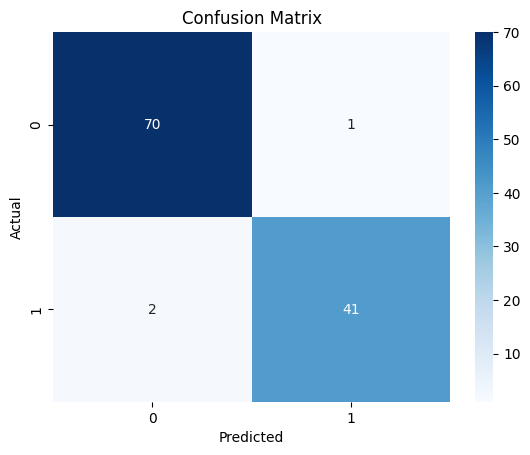

In [31]:
# 1. Confusion matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The heatmap shows how many samples fall into each category:

 *  Top-left (TN): Model correctly predicted "Benign"

 *  Bottom-right (TP): Model correctly predicted "Malignant"

 *  Top-right (FP): Model wrongly predicted "Malignant" (false alarm)

 *  Bottom-left (FN): Model missed a "Malignant" case (very bad in medical)

👉 Doctors hate FN — you don’t want to miss cancer.

In [32]:
# 2. Classification report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**Precision** :	Of all predicted "Malignant", how many were actually malignant?	    TP / (TP + FP)

**Recall**  :	Of all actual "Malignant", how many did we correctly predict?	    TP / (TP + FN)

**F1-score**  :	Balance between Precision and Recall (harmonic mean)	    2 * (P * R) / (P + R)

In [33]:
# 3. ROC-AUC Score

y_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {auc:.4f}")

ROC-AUC Score: 0.9974


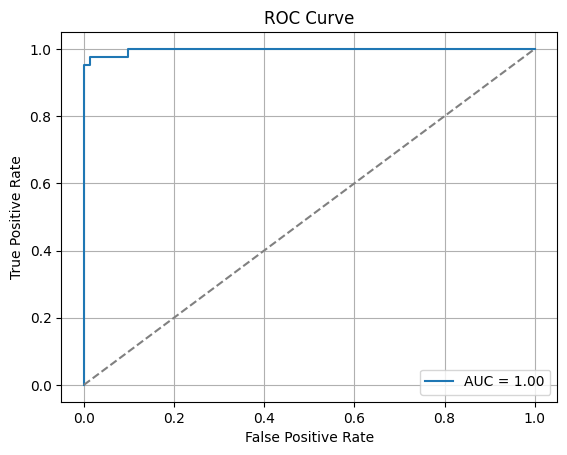

In [34]:
# 4. ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

X-axis = False Positive Rate (FPR)

Y-axis = True Positive Rate (TPR)

The closer the curve is to the top-left, the better.


ROC Curve	=  Receiver Operating Characteristic curve

AUC Score	=  Area under the curve (0 to 1) — higher is better
*  AUC = 1.0 → Perfect
*  AUC = 0.5 → Random guessing
*  AUC < 0.5 → Worse than guessing

**Step 5** : Sigmoid Function

### What is the Sigmoid Function?

*  The sigmoid function is used in logistic regression to convert raw values (log-odds) into probabilities between 0 and 1.

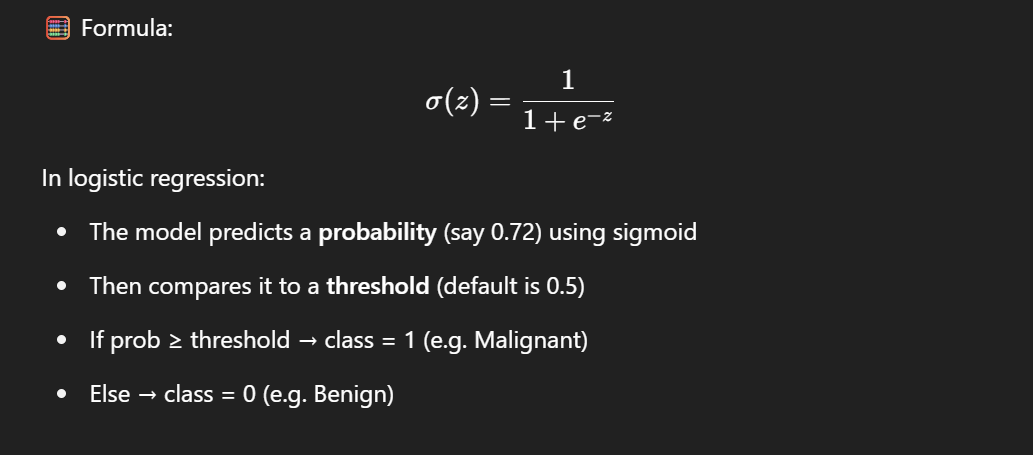

for ex.

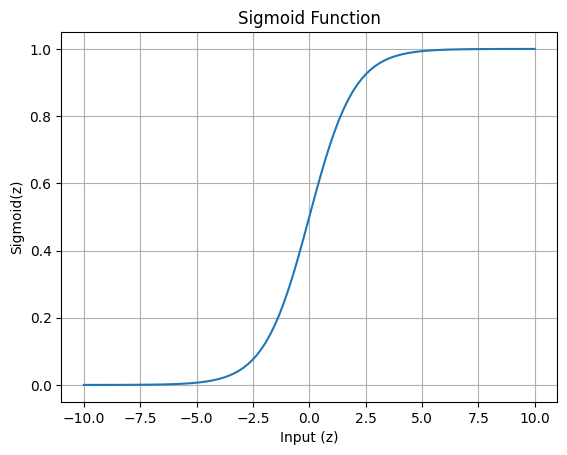

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.title("Sigmoid Function")
plt.xlabel("Input (z)")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.show()


**Step 6** : Threshold Tuning


Sometimes the default threshold (0.5) is not best — especially when:

*  False negatives are costly (e.g., cancer detection)

*  Data is imbalanced

Let’s test how changing the threshold affects predictions.

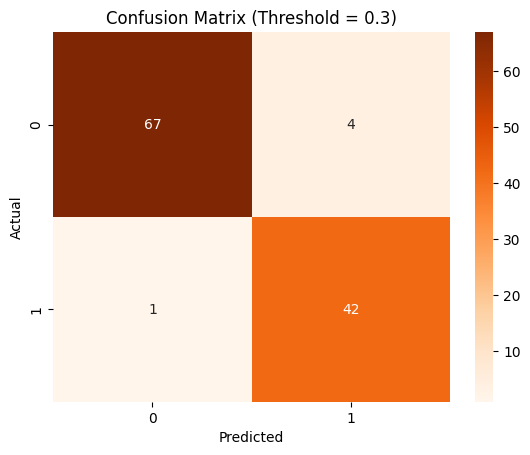

In [36]:
# Custom threshold
custom_threshold = 0.3
y_pred_custom = (y_proba >= custom_threshold).astype(int)

# New confusion matrix
cm_custom = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm_custom, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold = {custom_threshold})")
plt.show()


You can try different values like 0.4, 0.6, etc. and observe how performance changes.



So, Task 04 is done.